# 散布図

2変量のデータを2軸の平面にプロットした図を散布図といいます．

ここでは，身長と体重の2変量についての散布図を確認します．

### ライブラリーの搬入
Pythonで散布図を描画するには，matplotlib.pyplotの<font color=green>scatter()</font>関数を使用します．
まずは，必要なライブラリーを搬入します．

```Python
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### データフレームの作成
クレンジング済みのデータをCSVファイルから取り込んでデータフレームを作成します．

```Python
df = pd.read_csv('./cleansed_body_data2.csv')
df.set_index('person',inplace=True)
```

In [2]:
df = pd.read_csv('./cleansed_body_data2.csv')
df.set_index('person',inplace=True)

### 散布図の描画
グラフの作成には，次の関数を使用します．
- <font face='courier new' color='green'>scatter</font>：散布図の点の描画
- <font face='courier new' color='green'>xlabel</font>：x軸のラベル
- <font face='courier new' color='green'>ylabel</font>：y軸のラベル
- <font face='courier new' color='green'>axis</font>：グラフの縦横比の指定
- <font face='courier new' color='green'>show</font>：完成した図の表示

### scatter()関数

scatter()関数の構文は次の通りになります．

> <font face='courier new' color='green'>matplotlib.pyplot.scatter(*xdata*,*ydata*, **kwdargs)</font>

**必須の引数**
- xdata：x軸方向のデータを配列で指定
- ydata：y軸方向のデータを配列で指定

ただし，xdata と ydata の配列のサイズは同じです．
2次元平面において，プロットする点は，$(x_i,y_i)$ となります．

**主要なキーワード指定の引数**

\*\*kwargsは，キーワードを指定して値を与える引数です．

|引数|説明|デフォルト値|
|:---:|:---:|:---:|
| s    |マーカーのサイズ| =20 |
| color|マーカーの色|  |
| maker|マーカーの形| ='o' |
| edgecolor|マーカーの縁の色|  |
| alpha |マーカーの透明度, 0:透明～1:不透明| 1 |

scatter()関数の詳細についてはマニュアルを参照してください．
[https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

散布図の描画プログラムは次の通りです．
```Python
plt.scatter(df['height'],df['weight'],color='skyblue',edgecolor='blue',alpha=0.5)
plt.title('Scatter chart')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled')
plt.show()
```

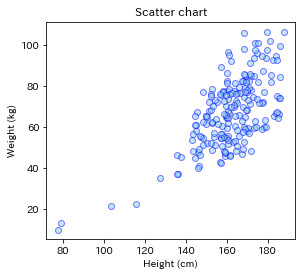

In [3]:
plt.scatter(df['height'],df['weight'],color='skyblue',edgecolor='blue',alpha=0.5)
plt.title('Scatter chart')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled')
plt.show()

この散布図を見ると身長と体重の間に何らかの関連性がありそうです．
2変量の間の直線的な関係を相関と言います．
相関については，後続のレクチャーで確認します．

### 複数データの散布図

scatter()関数において，そのマーカーの色や形を指定することができます．
そこで，異なるデータに対して，異なるマーカーを指定することにより，1つのグラフに複数の散布を表示することが可能になります．


> <font face='courier new' color='green'>matplotlib.pyplot.scatter(*xdata*,*ydata*,marker=*'o'*,color=*'blue'*)</font>

- <font face='courier new' color='green'>marker</font>：マーカーの種類，<font face='courier new'>'o', '^', '\*', 's' </font>など
- <font face='courier new' color='green'>color</font>：マーカーの色，<font face='courier new'>'blue', 'green', 'red' </font>など

データフレームにおいて，角括弧の中に条件を指定することによりデータの一部分を抽出することができます．  
例として，女性で血液型がAB型の人の身長データを抽出します．

```Python
df[(df.gender=='Female')&(df.blood=='AB')].height
```

In [4]:
df[(df.gender=='Female')&(df.blood=='AB')].height

person
p037    161.5
p108    162.4
p186    153.4
Name: height, dtype: float64

この方法を使って2種類のデータを抽出して散布図を作成します．
1. 男性の身長×体重
- 女性の身長×体重

```Python
plt.scatter(df[df.gender=='Male'].height,df[df.gender=='Male'].weight,marker='o',color='blue',label='Male')
plt.scatter(df[df.gender=='Female'].height,df[df.gender=='Female'].weight,marker='^',color='red',label='Female')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.axis('scaled')
plt.show()
```

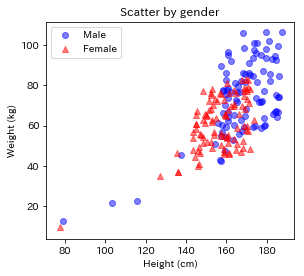

In [5]:
plt.scatter(df[df.gender=='Male'].height,df[df.gender=='Male'].weight,marker='o',color='blue',label='Male',alpha=0.5)
plt.scatter(df[df.gender=='Female'].height,df[df.gender=='Female'].weight,marker='^',color='red',label='Female',alpha=0.5)
plt.title('Scatter by gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.axis('scaled')
plt.show()

以上が散布図の描画方法です．

*****
## バブルチャート

散布図のマークの大きさは個々のプロットごとに変更することが可能です．
この機能を利用するとバブルチャートを描画することが可能となります．

ここでは，身長と体重を階級化して，その分布度数をバブルの大きさとしたチャートを作成します．
それぞれの値の1桁目を四捨五入して階級幅10の階級にします．
階級データはデータフレームの新しい列として保存します．

```Python
df['heightClass'] = round(df.height,-1)
df['weightClass'] = round(df.weight,-1)
```

In [6]:
df['heightClass'] = round(df.height,-1)
df['weightClass'] = round(df.weight,-1)

身長階級と体重階級のクロス集計を求めます．
クロス集計は，<font color='green'>pd.crosstab()</font>関数で求まります．

```Python
xHW = pd.crosstab(df.heightClass,df.weightClass)
xHW
```

In [7]:
xHW = pd.crosstab(df.heightClass,df.weightClass)
xHW

weightClass,10.0,20.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0
heightClass,,,,,,,,,,
80.0,2,0,0,0,0,0,0,0,0,0
100.0,0,1,0,0,0,0,0,0,0,0
120.0,0,1,0,0,0,0,0,0,0,0
130.0,0,0,1,0,0,0,0,0,0,0
140.0,0,0,3,4,3,1,0,0,0,0
150.0,0,0,2,9,11,8,4,0,0,0
160.0,0,0,2,17,12,15,14,3,2,0
170.0,0,0,0,4,12,9,16,5,4,1
180.0,0,0,0,0,4,6,4,7,3,1


このように，クロス集計は身長と体重の階級の組み合わせた値の度数になっています．

この表からクロス集計の値がゼロでない階級と度数の組を抽出して新しいデータフレームとして作成します．
この抽出にはリスト内包表記にてfor構文を2重に使用しています．

```Python
hwc = [[b,a,xHW[a][b]] for b in set(df.heightClass.dropna()) for a in set(df.weightClass.dropna()) if xHW[a][b]!=0 ]
dfX = pd.DataFrame(hwc,columns=['height','weight','counts'])
dfX.head(3)
```

In [8]:
hwc = [[b,a,xHW[a][b]] for b in set(df.heightClass.dropna()) for a in set(df.weightClass.dropna()) if xHW[a][b]!=0 ]
dfX = pd.DataFrame(hwc,columns=['height','weight','counts'])
dfX.head(3)

,height,weight,counts
0,160.0,100.0,2
1,160.0,70.0,15
2,160.0,40.0,2


matplotlibのscatter()関数でX軸データをdfX.height，Y軸データをdfX.weight，円のサイズをdfX.countsにして，バブルチャートを描画します．

> <font face='courier new' color='green'>
plt.scatter(dfX.height,dfX.weight,s=20*dfX.counts,color='skyblue',edgecolor='blue',alpha=0.5)
</font>

ここでパラメータは次の通りです．

- <font face='courier new'>s=20\*dfX</font>：円の大きさ  
- <font face='courier new'>color='skyblue'</font>：円の色  
- <font face='courier new'>edgecolor='blue'</font>：円の縁の色  
- <font face='courier new'>alpha=0.5</font>：円の透過度  

さらにグラフに幾つかの情報を加えた次のプログラムで描画します．

```Python
plt.scatter(dfX.height,dfX.weight,s=20*dfX.counts,color='skyblue',edgecolor='blue',alpha=0.5)
plt.title('Bubble chart')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled') 
plt.show()
```

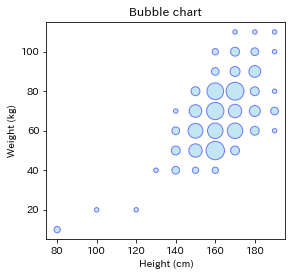

In [9]:
plt.scatter(dfX.height,dfX.weight,s=20*dfX.counts,color='skyblue',edgecolor='blue',alpha=0.5)
plt.title('Bubble chart')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled') 
plt.show()

一般的にバブルチャートはポートフォリオを示すグラフとして利用されます．

*****